In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist

In [2]:
f_mnist = tf.keras.datasets.fashion_mnist

(train_img, train_lbl), (test_img, test_lbl)= f_mnist.load_data()
train_img.shape, train_lbl.shape, test_img.shape ,test_lbl.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

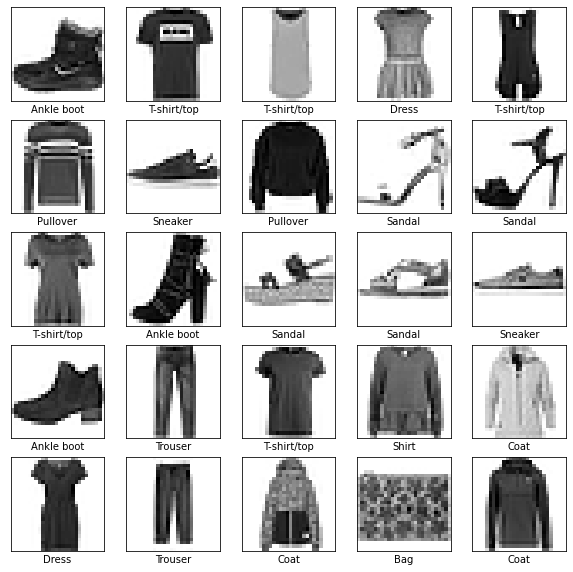

In [3]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_lbl[i]])
plt.show()

In [4]:
train_img = train_img.reshape(train_img.shape[0], train_img.shape[1], train_img.shape[2], 1)
test_img = test_img.reshape(test_img.shape[0], test_img.shape[1], test_img.shape[2], 1)

train_img = train_img/255
test_img = test_img/255

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential([Conv2D(64, (3,3), activation='relu', input_shape=(train_img.shape[1], train_img.shape[2], 1)),
                    MaxPool2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D(2,2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

In [6]:
from keras import optimizers

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
import timeit
tic = timeit.default_timer()
trained_model = model.fit(train_img, train_lbl, batch_size=32, epochs=30, verbose=1, validation_data=(test_img, test_lbl))
toc = timeit.default_timer()

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6165 - accuracy: 0.7783 - val_loss: 0.3634 - val_accuracy: 0.8670
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2989 - accuracy: 0.8901 - val_loss: 0.2914 - val_accuracy: 0.8914
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2497 - accuracy: 0.9082 - val_loss: 0.2769 - val_accuracy: 0.8995
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2222 - accuracy: 0.9177 - val_loss: 0.2635 - val_accuracy: 0.9026
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1894 - accuracy: 0.9289 - val_loss: 0.2701 - val_accuracy: 0.9025
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1623 - accuracy: 0.9379 - val_loss: 0.2724 - val_accuracy: 0.9061
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1423 - accuracy: 0.9474 - val_loss: 0.2595 - val_ac

In [10]:
print('The Running Time is:', toc-tic)

The Running Time is: 324.9750609939997


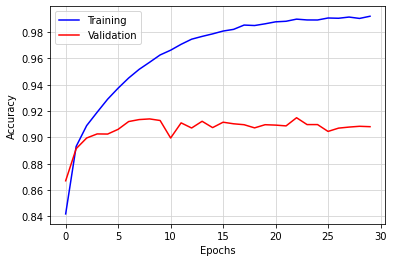

In [17]:
history = trained_model.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(acc_tra, 'blue')
plt.plot(acc_val,'red')

plt.legend(['Training', 'Validation'])
plt.grid(c='lightgrey')
plt.show()

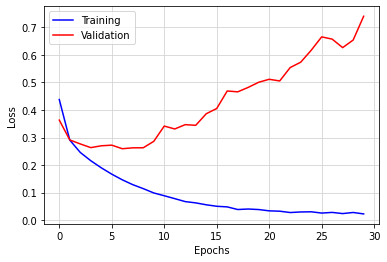

In [18]:
loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(loss_tra, 'blue')
plt.plot(loss_val,'red')

plt.legend(['Training', 'Validation'])
plt.grid(c='lightgrey')
plt.show()